In [288]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

La anatomia patologica es el diagnostico de certeza  para definir si una pieza anatomo patologica es benigna o maligna
Citologica (relacion cromatina, citoplamsa, etc.), 
histologica (),
molecular

bordes espiculados
microcalcificaciones 
areas de necrosis
areas de hemorragia


Radio: si, histologica

Textura: no (dificil de definir matematicamente, medida subjetiva del ojo profesional) (desvio estandar de escala de grises)

Perimetro: si, histologica

Area: si, histologica

Smoothness: si, histologica (variacion de longitudes de radio)

Compactness: si, citologica/histologica (perimetro^2 / area - 1.0)

Concancvness: no

Symmetry : si

Dimension fractal: no

Analisis clinico solo fisico

Analisis imagenologico

Limitaciones: si son valores de medias de células el alcance es limitadisimo por lo costoso de las determinaciones
. Si es promedio de tumores le faltarian varias variables para ser definitivo el diagnostico, por ahora seria
presuntivo

Alcance: analisis presuntivo de variables fisicas, faltarian determinaciones moleculares y citologicas para un
diagnostico definitivo
Posible analisis complementario anatomo patologico o imagenologico (mujeres mayores por relacion menor 
tejido conectivo/mamario)

In [70]:
df = pd.read_csv ('data.csv')

In [71]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Arreglos df 

In [72]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [77]:
df = df.drop (['id'])
df.drop("Unnamed: 32",axis=1,inplace=True)

In [78]:
df.head ()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [81]:
df ['diagnosis'] = df ['diagnosis'].map({'M':1,'B':0})

In [83]:
df.columns = ['Diagnosis', 'Radius mean', 'Texture mean', 'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean', 'Concavity mean', 'Concave points mean', 'Symmetry mean', 'Fractal dimension mean', 'Radius se', 'Texture se', 'Perimeter se', 'Area se', 'Smoothness se', 'Compactness se', 'Concavity se', 'Concave points se', 'Symmetry se', 'Fractal dimension se', 'Radius w', 'Texture w', 'Perimeter w', 'Area w', 'Smoothness w', 'Compactness w', 'Concavity w', 'Concave points w', 'Symmetry w', 'Fractal dimension w']

In [86]:
df.head ()

,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,Symmetry mean,...,Radius w,Texture w,Perimeter w,Area w,Smoothness w,Compactness w,Concavity w,Concave points w,Symmetry w,Fractal dimension w
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
mean_variables = list (df.columns [1:11])
print (mean_variables)

['Radius mean', 'Texture mean', 'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean', 'Concavity mean', 'Concave points mean', 'Symmetry mean', 'Fractal dimension mean']


# Info df

In [89]:
df.describe ()

,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,Symmetry mean,...,Radius w,Texture w,Perimeter w,Area w,Smoothness w,Compactness w,Concavity w,Concave points w,Symmetry w,Fractal dimension w
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [90]:
df ['Diagnosis'].count ()

569

In [91]:
df [df.Diagnosis == 0].count ()

Diagnosis                 357
Radius mean               357
Texture mean              357
Perimeter mean            357
Area mean                 357
Smoothness mean           357
Compactness mean          357
Concavity mean            357
Concave points mean       357
Symmetry mean             357
Fractal dimension mean    357
Radius se                 357
Texture se                357
Perimeter se              357
Area se                   357
Smoothness se             357
Compactness se            357
Concavity se              357
Concave points se         357
Symmetry se               357
Fractal dimension se      357
Radius w                  357
Texture w                 357
Perimeter w               357
Area w                    357
Smoothness w              357
Compactness w             357
Concavity w               357
Concave points w          357
Symmetry w                357
Fractal dimension w       357
dtype: int64

In [92]:
df [df.Diagnosis == 1].count ()

Diagnosis                 212
Radius mean               212
Texture mean              212
Perimeter mean            212
Area mean                 212
Smoothness mean           212
Compactness mean          212
Concavity mean            212
Concave points mean       212
Symmetry mean             212
Fractal dimension mean    212
Radius se                 212
Texture se                212
Perimeter se              212
Area se                   212
Smoothness se             212
Compactness se            212
Concavity se              212
Concave points se         212
Symmetry se               212
Fractal dimension se      212
Radius w                  212
Texture w                 212
Perimeter w               212
Area w                    212
Smoothness w              212
Compactness w             212
Concavity w               212
Concave points w          212
Symmetry w                212
Fractal dimension w       212
dtype: int64

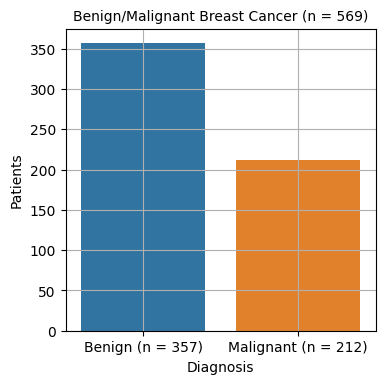

In [93]:
# Figure 1

plt.figure(figsize=(4,4), dpi = 100)
sns.countplot (df['Diagnosis'])
plt.xlabel ('Diagnosis')
plt.ylabel ('Patients')
plt.xticks([0, 1], ['Benign (n = 357)', 'Malignant (n = 212)'])
plt.grid ()
plt.title ('Benign/Malignant Breast Cancer (n = 569)', size = 10)
#plt.tick_params (colors = 'b')
plt.show ()

Fig 1: Histograma del número total de pacientes en el estudio agrupados según su diagnóstico de Cáncer de mama entre benigno o maligno.

En el dataset un mayor número de pacientes presentó un desarrollo benigno de cáncer de mama

In [364]:
#dfM = df[df['Diagnosis'] ==1].mean ()
#dfB = df[df['Diagnosis'] ==0]


df_group = df.groupby (df ['Diagnosis']).mean ()
df_group

,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,Symmetry mean,Fractal dimension mean,...,Radius w,Texture w,Perimeter w,Area w,Smoothness w,Compactness w,Concavity w,Concave points w,Symmetry w,Fractal dimension w
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [330]:
df_radius = df.groupby (df ['Diagnosis']).mean () ['Radius mean']

Diagnosis
0    12.146524
1    17.462830
Name: Radius mean, dtype: float64

In [367]:
df_area = df.groupby (df ['Diagnosis']).mean () ['Area mean']
df_area

Diagnosis
0    462.790196
1    978.376415
Name: Area mean, dtype: float64

In [368]:
df_perimeter = df.groupby (df ['Diagnosis']).mean () ['Perimeter mean']
df_perimeter

Diagnosis
0     78.075406
1    115.365377
Name: Perimeter mean, dtype: float64

In [369]:
df_concave_points = df.groupby (df ['Diagnosis']).mean () ['Concave points mean']
df_concave_points

Diagnosis
0    0.025717
1    0.087990
Name: Concave points mean, dtype: float64

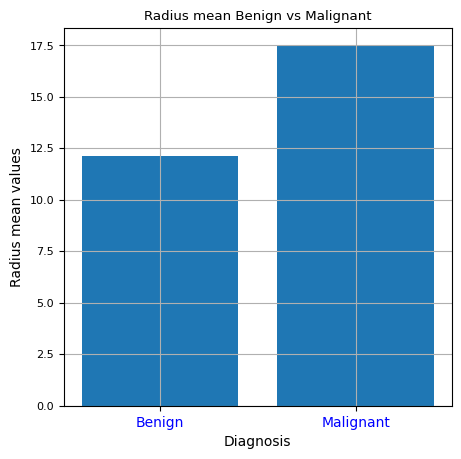

In [370]:
names = ['Benign', 'Malignant']
values = [12.146524, 17.462830]


plt.figure (figsize = (5, 5), dpi = 100)
plt.bar (names, values)
plt.xlabel ('Diagnosis', size = 10)
plt.ylabel ('Radius mean values', size = 10)
plt.xticks (size = 10, color = 'b')
plt.grid ()
plt.title ('Radius mean Benign vs Malignant')


plt.show ()

In [365]:
#df_radius = df.groupby (['Diagnosis']).mean ().sort_values('Radius mean', ascending=False)

#print (df_radius)

# Multicolinealidad

In [96]:
correlation = df [mean_variables].corr ()

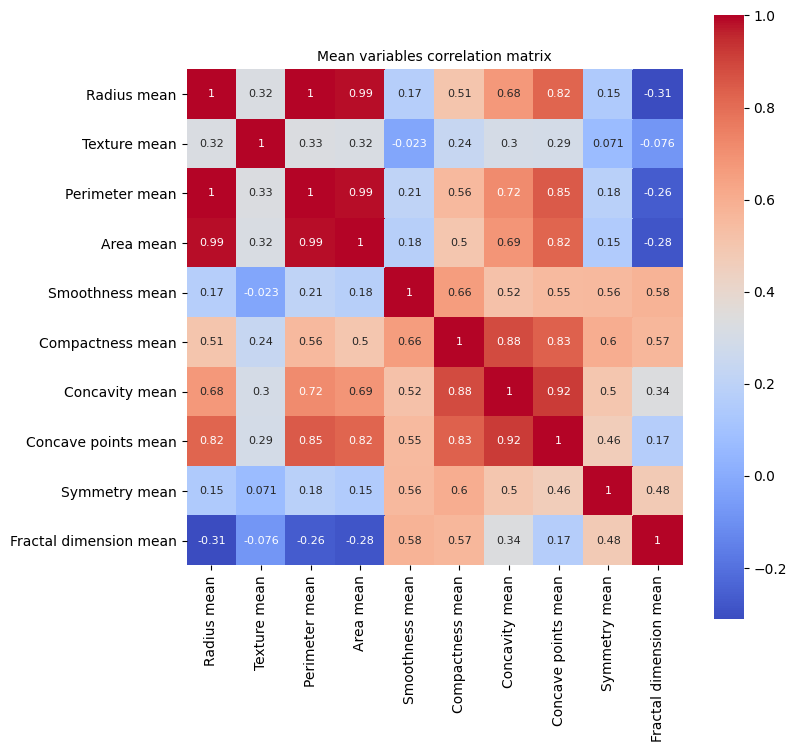

In [98]:
# Figure 2

plt.figure(figsize=(8, 8), dpi = 100)
sns.heatmap(correlation, cbar = True,  square = True, annot=True,
            annot_kws={'size': 8}, xticklabels= mean_variables, yticklabels= mean_variables, cmap= 'coolwarm')

plt.title ('Mean variables correlation matrix', size = 10)
plt.show ()

Fig 2: Mapa de color de correlación entre los promedios de las variables. Valores cercanos a +1 (Bordo) muestran correlación positiva y valores cercanos a -1 (Azul) muestran correlación negativa entre las variables.

El promedio del radio, perímetro y área estan altamente correlacionados positivamente(0,99-1): Radio-Perímetro, Radio-Área, Área-Perímetro. Habria que elegir una de estas para hacer la clasificación.

Todas las variables tienen un grado de correlación positiva, excepto por el promedio de 'suavidad' y 'textura', la cuál es levemente negativa (-0,023). Fractal dimension tiene relaciones negativas con radio, textura, perimetro y area.

Textura según su definicion matemática no iguala al criterio profesional de diagnostico imagenologico.

Las variables a utilizar para la clasificación según las correlaciones y criterios profesionales serán: Area, Smoothness y Symmetry.

En base a las correlaciones: Radius, Texture, Smoothness y Symmetry

En base al criterio profesional: Todo menos dimension fractal y concavidades.

# Matriz de dispersión

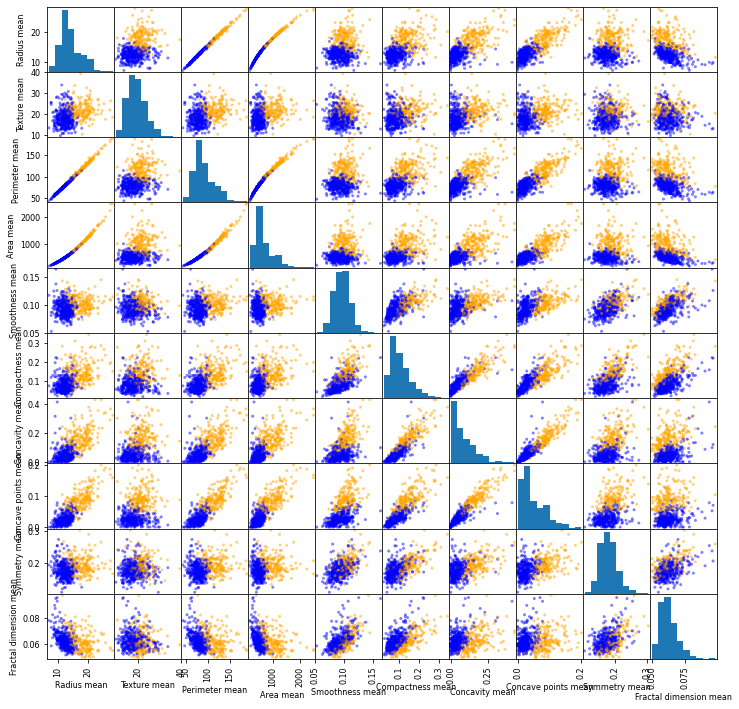

In [371]:
# Figura 3

color_function = {0: "blue", 1: "orange"} 
colors = df ["Diagnosis"].map(lambda x: color_function.get(x))
pd.plotting.scatter_matrix (df [mean_variables], c = colors, alpha = 0.5, figsize = (12, 12))


plt.show ()

Fig.3 : Matriz de dispersión de todas las variables de df.

Area, Radio, Perimetro y puntos de concavidad

In [134]:
df_corr_pro = pd.read_csv ('breast_modified.csv')

In [144]:
df_corr_pro.head (5)

,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,Symmetry mean,Fractal dimension mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883


In [154]:
#df_corr_pro = df_corr_pro.drop (columns = ['Radius mean', 'Texture mean', 'Perimeter mean', 'Compactness mean', 'Concavity mean', 'Concave points mean', 'Fractal dimension mean'])

corr_pro_variables = list (df_corr_pro.columns [1:])

df_corr_pro.info ()

print (corr_pro_variables)

# df_corr_pro.to_csv ('breast_modified.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diagnosis        569 non-null    int64  
 1   Area mean        569 non-null    float64
 2   Smoothness mean  569 non-null    float64
 3   Symmetry mean    569 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 17.9 KB
['Area mean', 'Smoothness mean', 'Symmetry mean']


In [140]:
df_corr = pd.read_csv ('breast_modified.csv')

In [155]:
# df_corr = df_corr.drop (columns = ['Perimeter mean', 'Area mean', 'Compactness mean', 'Concavity mean', 'Concave points mean', 'Fractal dimension mean'])

corr_variables = list (df_corr.columns [1:])


df_corr.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diagnosis        569 non-null    int64  
 1   Radius mean      569 non-null    float64
 2   Texture mean     569 non-null    float64
 3   Smoothness mean  569 non-null    float64
 4   Symmetry mean    569 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 22.4 KB


In [142]:
df_pro = pd.read_csv ('breast_modified.csv')

In [157]:
# df_pro = df_pro.drop (columns = ['Concavity mean', 'Concave points mean', 'Fractal dimension mean'])

pro_variables = list (df_pro.columns [1:])

df_pro.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diagnosis         569 non-null    int64  
 1   Radius mean       569 non-null    float64
 2   Texture mean      569 non-null    float64
 3   Perimeter mean    569 non-null    float64
 4   Area mean         569 non-null    float64
 5   Smoothness mean   569 non-null    float64
 6   Compactness mean  569 non-null    float64
 7   Symmetry mean     569 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 35.7 KB


# Train, test

In [274]:
prediction_corr_pro = ['Area mean', 'Smoothness mean', 'Symmetry mean']
prediction_corr = ['Radius mean', 'Texture mean', 'Smoothness mean', 'Symmetry mean']
prediction_pro = ['Radius mean', 'Texture mean', 'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean', 'Symmetry mean']
prediction_variables = ['Area mean', 'Radius mean', 'Perimeter mean', 'Concave points mean']

In [244]:
train, test = train_test_split (df, test_size = 0.3)

print (train.shape)
print (test.shape)

(398, 31)
(171, 31)


In [160]:
train_corr_pro, test_corr_pro = train_test_split (df_corr_pro, test_size = 0.3)

print (train_corr_pro.shape)
print (test_corr_pro.shape)

(398, 4)
(171, 4)


In [161]:
train_corr, test_corr = train_test_split (df_corr, test_size = 0.3)

print (train_corr.shape)
print (test_corr.shape)

(398, 5)
(171, 5)


In [162]:
train_pro, test_pro = train_test_split (df_pro, test_size = 0.3)

print (train_pro.shape)
print (test_pro.shape)

(398, 8)
(171, 8)


In [275]:
train_pre, test_pre = train_test_split (df, test_size = 0.3)

print (train_pre.shape)
print (test_pre.shape)

(398, 31)
(171, 31)


# Model  fit

In [266]:
def model(model,data,prediction,outcome):
    kf = KFold(data.shape[0], n_splits=10)

In [375]:
#def classification_model(model,data,prediction_input,output):
#    model.fit(data[prediction_input],data[output])
#    predictions = model.predict(data[prediction_input])
#    accuracy = metrics.accuracy_score(predictions,data[output])
#    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
#    kf = KFold(data.shape[0], n_splits = 10)
#    error = []
#    for train, test in kf:
#        train_x = (data[prediction_input].iloc[train,:])
#       train_y = data[output].iloc[train]
#        model.fit(train_X, train_y)
#        test_X = data[prediction_input].iloc[test,:]
#        test_y = data[output].iloc[test]
#        error.append(model.score(test_X,test_y))
         
#        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [377]:
#model = DecisionTreeClassifier()
#prediction_var = ['Area mean', 'Radius mean', 'Perimeter mean', 'Concave points mean']
#outcome_var= "Diagnosis"
#classification_model(model,df,prediction_var,outcome_var)

In [268]:
model = DecisionTreeClassifier()
prediction_variables = ['Area mean', 'Radius mean', 'Perimeter mean', 'Concave points mean']
outcome_var= "Diagnosis"

classification_model(model, df, prediction_variables,outcome_var)

Accuracy : 100.000%


In [286]:
dt = DecisionTreeClassifier()
k = 5
cv_result = cross_val_score(dt,train_x_pre, train_y_pre,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.9125     0.925      0.85       0.91139241 0.91139241]
CV scores average:  0.9020569620253165


In [269]:
model = LogisticRegression()
prediction_variables = ['Area mean', 'Radius mean', 'Perimeter mean', 'Concave points mean']
outcome_var= "Diagnosis"

classification_model(model, df, prediction_variables,outcome_var)

Accuracy : 89.631%


/home/dani/ambiente1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [287]:
lr = LogisticRegression()
k = 5
cv_result = cross_val_score(lr,train_x_pre, train_y_pre,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.9125     0.875      0.825      0.87341772 0.91139241]
CV scores average:  0.8794620253164556


In [270]:
model = KNeighborsClassifier()
prediction_variables = ['Area mean', 'Radius mean', 'Perimeter mean', 'Concave points mean']
outcome_var= "Diagnosis"

classification_model(model, df, prediction_variables,outcome_var)

Accuracy : 90.510%


In [378]:
kn = KNeighborsClassifier()
k = 5
cv_result = cross_val_score(kn,train_x_pre, train_y_pre,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.8875     0.8375     0.8        0.83544304 0.91139241]
CV scores average:  0.8543670886075951


In [271]:
model = RandomForestClassifier(n_estimators=100)
prediction_variables = ['Area mean', 'Radius mean', 'Perimeter mean', 'Concave points mean']
outcome_var= "Diagnosis"

classification_model(model, df, prediction_variables,outcome_var)

Accuracy : 100.000%


In [284]:
rf = RandomForestClassifier(n_estimators=100)
k = 5
cv_result = cross_val_score(rf,train_x_pre, train_y_pre,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.95       0.9375     0.8375     0.92405063 0.92405063]
CV scores average:  0.9146202531645571


# Random Forest

In [276]:
model = RandomForestClassifier (n_estimators = 100)


In [247]:
train_x = train [mean_variables]
train_y = train.Diagnosis

test_x = test [mean_variables]
test_y = test.Diagnosis

model.fit(train_x, train_y)

prediction = model.predict (test_x)

metrics.accuracy_score (prediction, test_y)

0.9649122807017544

Precisión del modelo de un 96% con todas las variables

# pre

In [277]:
train_x_pre = train_pre [prediction_variables]
train_y_pre = train_pre.Diagnosis

test_x_pre = test [prediction_variables]
test_y_pre = test.Diagnosis

model.fit(train_x_pre, train_y_pre)

prediction = model.predict (test_x_pre)

metrics.accuracy_score (prediction, test_y_pre)

0.9707602339181286

Precisión del modelo de un 97% con las variables pre

# corr_pro

In [191]:
model.fit(train_x_corr_pro, train_y_corr_pro)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
model = RandomForestClassifier (n_estimators = 100)

train_x_corr_pro = train_corr_pro [prediction_corr_pro]
train_y_corr_pro = train_corr_pro.Diagnosis

test_x_corr_pro = test_corr_pro [prediction_corr_pro]
test_y_corr_pro = test_corr_pro.Diagnosis

model.fit(train_x_corr_pro, train_y_corr_pro)

prediction = model.predict (test_x_corr_pro)

metrics.accuracy_score (prediction, test_y_corr_pro)

0.8830409356725146

Precisión del modelo de un 88% con las variables corr_pro

In [221]:
variables_corr_pro_imp = pd.Series(model.feature_importances_, index = prediction_corr_pro).sort_values(ascending=False)

print (variables_corr_pro_imp)

Area mean          0.633237
Smoothness mean    0.201923
Symmetry mean      0.164840
dtype: float64


# corr

In [223]:
train_x_corr = train_corr [prediction_corr]
train_y_corr = train_corr.Diagnosis

test_x_corr = test_corr [prediction_corr]
test_y_corr = test_corr.Diagnosis

model.fit(train_x_corr, train_y_corr)

prediction = model.predict (test_x_corr)

metrics.accuracy_score (prediction, test_y_corr)

0.9415204678362573

Precisión del modelo de un 94 % con las variables corr

In [224]:
variables_corr_imp = pd.Series(model.feature_importances_, index = prediction_corr).sort_values(ascending=False)

print (variables_corr_imp)

Radius mean        0.561951
Texture mean       0.212401
Smoothness mean    0.134258
Symmetry mean      0.091390
dtype: float64


# pro

In [208]:
train_x_pro = train_pro [prediction_pro]
train_y_pro = train_pro.Diagnosis

test_x_pro = test_pro [prediction_pro]
test_y_pro = test_pro.Diagnosis

model.fit(train_x_pro, train_y_pro)

prediction = model.predict (test_x_pro)

metrics.accuracy_score (prediction, test_y_pro)

0.9239766081871345

Precisión del modelo de un 94 % con las variables pro

In [216]:
variables_pro_imp = pd.Series(model.feature_importances_, index = prediction_pro).sort_values(ascending=False)

print (variables_pro_imp)

Area mean           0.306699
Perimeter mean      0.294824
Compactness mean    0.124820
Texture mean        0.092815
Radius mean         0.071301
Smoothness mean     0.069836
Symmetry mean       0.039705
dtype: float64


Multicolinealidad no afecta a ninguno de los modelos puestos a prueba. En base al principio de parsimonia, el modelo mas simple de plantear, construir y con variables acotadas sería el indicado en este caso, ya que no hay diferencias significativas entre los porcentajes de precisión al utilizar todas las variables o las seleccionadas en base a la correlación o criterio profesional

# Confusion matrix

In [290]:
cm = confusion_matrix(test_y_pre, prediction)
print('Confusion matrix: \n',cm)

Confusion matrix: 
 [[109   4]
 [  1  57]]


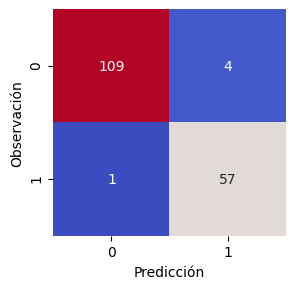

In [314]:
# Figura 4

plt.figure(figsize=(3,3), dpi = 100)
sns.heatmap(cm, annot = True,fmt = "d", cmap= 'coolwarm', cbar = False) 
plt.xlabel ('Predicción')
plt.ylabel ('Observación')

plt.show()

Figura 4: Matriz de confusión Benigno (0) vs Maligno (1)

Test (n=171)

Benigno: Se predijeron 109 correctamente y 4 falsos negativos (98% precisión)

Maligno: Se predijeron 57 correctamente y 1 falso positivo (89% precisión)



# Conclusiones

Se logró desarrollar un método de clasificación en base a variables cuantitativas definididas a priori en la base de datos.
se generaron distintos grupos con las variables, en base a criterios teoricos del cancer de mama, criterio estadistico en base al analisis de multicolinealidad y matriz de dispersion, un conjunto de ambos criterios y utilizando todas las variables; y a su vez se compararon todos entre si en base al porcentaje de precisión al modelo de clasificación elegido, Random Forest.
La precisión mas alta se observó al utilizar el grupo "pre", el cual se generó en base a los resultados observados en el grafico de matriz de dispersión. La variable "Concave points mean" no esta descripta en la bibliografía como un punto determinante en el diagnostico de cancer de mama, siendo un resultado llamativo. En futuros estudios se debería detallar como se llevó a cabo la medición de esta variable para decidir si es de confianza o no para el diagnóstico.
Por último habría que hacer hincapié en el único falso positivo antes que en disminuir los falsos negativos.